In [1]:
import tree

def p_liscia(g: int):
    if g == 0:
        return 0.0
    else:
        return 0.25

In [2]:
res = tree.init_tree(4, 2, [(1, 5), (1, 5)], 2, p_liscia)
res2 = tree.init_tree(4, 2, [(1, 5), (1, 5)], 2, p_liscia)

In [3]:
tree.print_tree(res)
print("\n\n")
tree.print_tree(res2)

                                   (1|1.70)                                    
                  [1]                                  (0|1.49)                
                                             (1|2.74)            (1|2.18)      
                                        (1|2.18)  (1|1.86)  (1|3.56)  (0|3.27) 
                                        [0]  [1]  [0]  [1]  [1]  [0]  [1]  [0] 



                                   (0|3.41)                                    
               (0|2.18)                                (0|2.18)                
     (0|2.74)            (0|2.99)            (1|1.54)            (0|3.35)      
(1|3.18)  (1|3.61)  (1|3.65)     [1]    (1|4.89)  (1|3.79)  (1|3.88)  (1|4.95) 
[1]  [0]  [0]  [1]  [1]  [0]            [1]  [0]  [1]  [0]  [0]  [1]  [1]  [0] 


In [4]:
from reproduction import *
from matplotlib import pyplot as plt
from tree import *

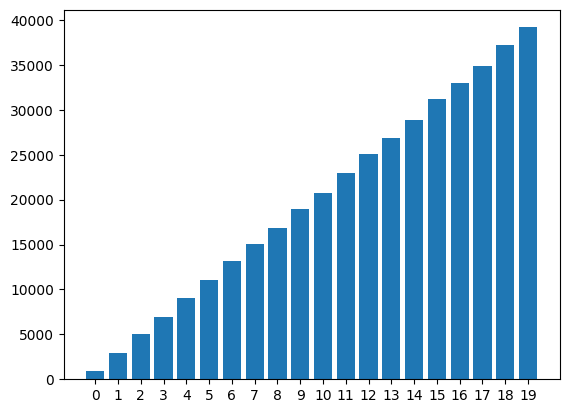

In [5]:
trees = [DecisionTree(LeafNode(0)) for _ in range(20)]
fitnesses = [float(x ** 2) for x in range(20)]
selected: list[DecisionTree] = []
for _ in range(20000):
    # selected += proportional_reproduction(trees, fitnesses)
    # selected += rank_reproduction(trees, fitnesses, 1/4, 1/4)
    # selected += truncation_reproduction(trees, fitnesses, 2/3)
    selected += tournament_reproduction(trees, fitnesses, 2)
counts = [0] * 20
for tree in selected:
    counts[trees.index(tree)] += 1
plt.bar(list(range(20)), counts)
plt.xticks(list(range(20)), [str(i) for i in range(20)])
plt.show()

In [6]:
from evo_tree import *
from succesion import *
from sklearn.model_selection import train_test_split
import pandas as pd
from ucimlrepo import fetch_ucirepo
from random import seed
from helpers import cross_validate

In [7]:
seed(0)

tree = EvoTree(
    5, 10, lambda x: 1 - (1 / (x + 1)), 500,
    proportional_reproduction, 0, 0, 0,
    generational_succession
    )

data = fetch_ucirepo(id=17).data  # type: ignore

target = data.targets.squeeze()  # type: ignore

attrs = data.features  # type: ignore

x, x_test, y, y_test = train_test_split(
    attrs, target, test_size=0.2, random_state=42)

X, X_ts, y, y_ts = train_test_split(attrs, target, test_size=0.2, random_state=42)

accuracy, std_dev, min_score, max_score = cross_validate(
                                    tree, x, y)

print(accuracy, std_dev, min_score, max_score)

0.6637362637362637 0.15337447316367384 0.45054945054945056 0.8241758241758241
